In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.shape,df_test.shape

((891, 12), (418, 11))

In [5]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
((df_train.isnull().sum())*df_train.shape[0])*100

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age            15770700
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin          61211700
Embarked         178200
dtype: int64

In [7]:
# combined
combined = pd.concat([df_train,df_test],ignore_index=True)
combined.shape

(1309, 12)

In [8]:
# count , bar , boxplot in logistic 


In [9]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [10]:
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
combined.loc[combined.Cabin.notnull(),'Pclass'].value_counts()

1    256
2     23
3     16
Name: Pclass, dtype: int64

In [12]:
# feature engineering cabin available cabin not available

In [13]:
# bin the cabins

cabins = combined.Cabin.unique()[1:]

def cab(x):
    if x in cabins:
        return('Cabin_alloted')
    else:
        return('Missing')

In [14]:
combined['Cabin_Cat'] = combined.Cabin.apply(cab)

In [15]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Missing
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin_alloted


<Axes: xlabel='Cabin_Cat'>

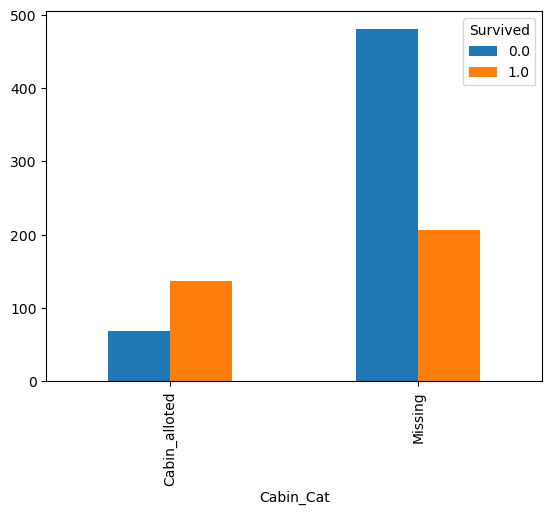

In [16]:
# cabin vs survived
tbl = pd.crosstab(combined.Cabin_Cat,combined.Survived)
tbl.plot(kind='bar')

In [17]:

df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [18]:
# parch and sibsp

combined['Family'] = combined.SibSp+combined.Parch+1

In [19]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Missing,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin_alloted,2


In [20]:
combined.Family.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [21]:
# 1 single ,2 couuple, 3 family,>3: large family

def fam(x):
    if x==1:
        return('Solo')
    elif x==2:
        return('Couple')
    elif x==3:
        return('Small_Family')
    else:
        return('Large_Family')

In [22]:
combined['Family_Cat'] = combined.Family.apply(fam)

In [23]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat,Family,Family_Cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Missing,2,Couple
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin_alloted,2,Couple


In [24]:
combined['Family_Cat'].value_counts()
# as 1 plus kra h to cuple m 235 couple nhi 235 people hai

Solo            790
Couple          235
Small_Family    159
Large_Family    125
Name: Family_Cat, dtype: int64

<Axes: xlabel='Family_Cat'>

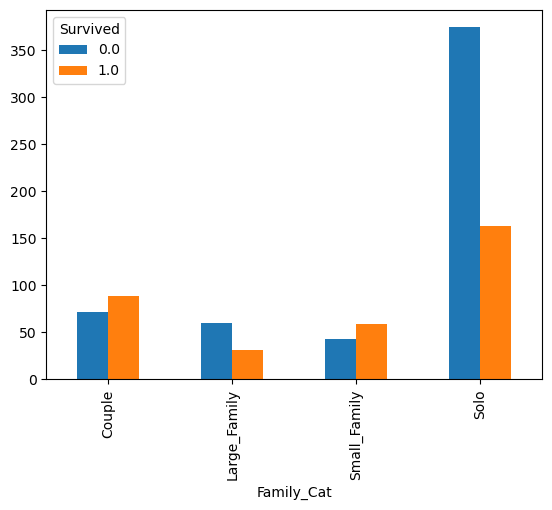

In [25]:
tbl = pd.crosstab(combined.Family_Cat,combined.Survived)
tbl.plot(kind='bar')

In [26]:
combined.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [27]:
combined.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,388.0,28.687088,14.576962,0.17,19.0,27.0,38.0,76.0
male,658.0,30.585228,14.280581,0.33,21.0,28.0,39.0,80.0


In [28]:
titles = []
for i in combined.Name:
    
    titles.append(i.split(',')[1].split('.')[0].strip())

In [29]:
combined['titles'] = pd.Series(titles) 

In [30]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat,Family,Family_Cat,titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Missing,2,Couple,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin_alloted,2,Couple,Mrs


In [31]:
combined.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [32]:
nhi_lunga_tujhe = ['Don', 'Rev', 'Dr', 'Mme', 
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

def chl_nikl(x):
    if x in nhi_lunga_tujhe:
        return('others')
    else:
        return(x)

In [33]:
combined['titles'] = combined.titles.apply(chl_nikl)

In [34]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat,Family,Family_Cat,titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Missing,2,Couple,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin_alloted,2,Couple,Mrs


In [35]:
combined.groupby('titles')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


In [36]:
combined.loc[combined.Age.isnull(),'titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'others', 'Ms'], dtype=object)

In [37]:
# imputing age missing value

In [38]:
combined.loc[(combined.Age.isnull()) & (combined.titles=='Master'),'Age'] = 4
combined.loc[(combined.Age.isnull()) & (combined.titles=='Miss'),'Age'] = 22
combined.loc[(combined.Age.isnull()) & (combined.titles=='Mr'),'Age'] = 29
combined.loc[(combined.Age.isnull()) & (combined.titles=='Mrs'),'Age'] = 35.5
combined.loc[(combined.Age.isnull()) & (combined.titles=='Ms'),'Age'] = 28
combined.loc[(combined.Age.isnull()) & (combined.titles=='others'),'Age'] = 45

In [39]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Cabin_Cat         0
Family            0
Family_Cat        0
titles            0
dtype: int64

In [40]:
combined.loc[combined.Fare.isnull(),'Fare'] = combined.Fare.median()

In [41]:
combined.Embarked.isnull()[combined.Embarked.isnull()!=0]

61     True
829    True
Name: Embarked, dtype: bool

In [42]:
combined.loc[combined.Embarked.isnull(),'Embarked'] = combined.Embarked.mode()[0]

In [43]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat,Family,Family_Cat,titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Missing,2,Couple,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin_alloted,2,Couple,Mrs


In [44]:
# Drop the Unnecessary columns
combined.drop(['PassengerId','SibSp','Parch','Name','Cabin','Ticket'],axis=1,inplace=True)

In [45]:
#pd.get_dummies(combined)

# split the Data in train and test
newtrain = combined.loc[0:df_train.shape[0]-1,:]
newtest = combined.loc[df_train.shape[0]:,:]

In [46]:
newtrain.shape,newtest.shape

((891, 10), (418, 10))

In [47]:
newtest.drop(columns=['Survived'],axis=1,inplace=True)

In [48]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Embarked    418 non-null    object 
 5   Cabin_Cat   418 non-null    object 
 6   Family      418 non-null    int64  
 7   Family_Cat  418 non-null    object 
 8   titles      418 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 29.5+ KB


In [49]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Cabin_Cat   891 non-null    object 
 7   Family      891 non-null    int64  
 8   Family_Cat  891 non-null    object 
 9   titles      891 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 69.7+ KB


## Statistical Test

In [50]:
newtrain.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Cat,Family,Family_Cat,titles
0,0.0,3,male,22.0,7.25,S,Missing,2,Couple,Mr


In [51]:
input_vars = ['Pclass','Sex','Embarked','Cabin_Cat','Family_Cat','titles']

# ho: that the predictors and target are independent . It means
# predictor variables are not helping in predicting the survival 

#ha: Ho is false


for i in input_vars:
    tbl = pd.crosstab(newtrain.loc[:,i],newtrain.Survived)
    teststats,pvalue,deg,exp_freq = stats.chi2_contingency(tbl)
    print(i,pvalue)

Pclass 4.549251711298793e-23
Sex 1.1973570627755645e-58
Embarked 2.3008626481449577e-06
Cabin_Cat 6.7419704360811776e-21
Family_Cat 4.6082741465220125e-11
titles 1.9783487591671835e-59


In [52]:
newtrain['Survived'].unique()

array([0., 1.])

In [53]:
# Dummyy

dummytrain = pd.get_dummies(newtrain,drop_first=True)
dummytest = pd.get_dummies(newtest,drop_first=True)

x = dummytrain.drop('Survived',axis=1)
y= dummytrain.Survived

In [54]:
x.shape,y.shape

((891, 16), (891,))

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression()
pred = logreg.fit(x,y).predict(dummytest)

In [57]:
# submission
submission = pd.read_csv('gender_submission.csv')

In [58]:
submission.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [59]:
submission['Survived'] = pred

In [60]:
submission['Survived'] = submission.Survived.astype(int)

In [61]:
submission.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [62]:
submission.to_csv('logregress.csv',index=False)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()

In [65]:
pred = rf.fit(x,y).predict(dummytest)

In [66]:
submission['Survived'] = pred

In [67]:
submission.head(2)

,PassengerId,Survived
0,892,0.0
1,893,0.0


In [68]:
submission['Survived'] = submission.Survived.astype(int)

In [69]:
submission.to_csv('randomforest.csv',index=False)

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gbm = GradientBoostingClassifier()

In [72]:
pred = gbm.fit(x,y).predict(dummytest)

In [73]:
submission['Survived'] = pred

In [74]:
submission['Survived'] = submission.Survived.astype(int)

In [75]:
submission.to_csv('gradientboosting.csv',index=False)

### Logistic Regression Model using Statsmodel

In [76]:
import statsmodels.api as sma

In [77]:
model = sma.Logit(y,x).fit()
model.summary()

         Current function value: 0.425795
         Iterations: 35


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      875
Method:                           MLE   Df Model:                           15
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.3606
Time:                        13:14:32   Log-Likelihood:                -379.38
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.405e-82
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Pclass                     -0.5159      0.179     -2.889      0.004      -0.866      -0.166
Age                        -0.0254      0.009     -2.716      0.007      -0.044      -0.007
Fare                        0.0058      0.003      2.038      0.042       0.000       0.011
Family                     -0.2792      0.181     -1.545      0.122      -0.634       0.075
Sex_male                    3.1430      0.646      4.867      0.000       1.877       4.409
Embarked_Q                 -0.1484      0.389     -0.382      0.702      -0.910       0.613
Embarked_S                 -0.2948      0.244     -1.210      0.226      -0.773       0.183
Cabin_Cat_Missing          -0.8933      0.315     -2.836      0.005      -1.511      -0.276
Family_Cat_Large_Family    -0.2141      0.715     -0.300      0.765      -1.615       1.187
Family_Cat_Small_Family     0.7003      0.389      1.799      0.072      -0.063       1.463
Family_Cat_Solo             0.3823      0.330      1.158      0.247      -0.265       1.030
titles_Miss                 3.7972      0.614      6.186      0.000       2.594       5.000
titles_Mr                  -2.1108      0.483     -4.370      0.000      -3.057      -1.164
titles_Mrs                  4.6859      0.691      6.783      0.000       3.332       6.040
titles_Ms                  24.2514   4.66e+04      0.001      1.000   -9.13e+04    9.13e+04
titles_others              -0.6287      0.648     -0.969      0.332      -1.900       0.642
===========================================================================================
"""

In [78]:
#  Final Logistic model
new_x = x.drop(['Family_Cat_Large_Family','Family','Embarked_Q','titles_Ms','titles_others','Fare'],axis=1)
model = sma.Logit(y,new_x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.438260
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.3419
Time:                        13:14:32   Log-Likelihood:                -390.49
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.426e-82
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Pclass                     -0.7247      0.156     -4.639      0.000      -1.031      -0.419
Age                        -0.0268      0.008     -3.348      0.001      -0.043      -0.011
Sex_male                    2.4993      0.481      5.200      0.000       1.557       3.441
Embarked_S                 -0.4054      0.198     -2.050      0.040      -0.793      -0.018
Cabin_Cat_Missing          -0.9539      0.302     -3.160      0.002      -1.545      -0.362
Family_Cat_Small_Family     0.9162      0.309      2.964      0.003       0.310       1.522
Family_Cat_Solo             0.9286      0.239      3.890      0.000       0.461       1.397
titles_Miss                 3.6134      0.447      8.076      0.000       2.736       4.490
titles_Mr                  -1.5082      0.341     -4.429      0.000      -2.176      -0.841
titles_Mrs                  4.6001      0.552      8.339      0.000       3.519       5.681
===========================================================================================
"""

In [79]:
model.params.index

Index(['Pclass', 'Age', 'Sex_male', 'Embarked_S', 'Cabin_Cat_Missing',
       'Family_Cat_Small_Family', 'Family_Cat_Solo', 'titles_Miss',
       'titles_Mr', 'titles_Mrs'],
      dtype='object')

In [80]:
model.params

Pclass                    -0.724745
Age                       -0.026838
Sex_male                   2.499262
Embarked_S                -0.405362
Cabin_Cat_Missing         -0.953872
Family_Cat_Small_Family    0.916156
Family_Cat_Solo            0.928605
titles_Miss                3.613427
titles_Mr                 -1.508230
titles_Mrs                 4.600149
dtype: float64

### make the model with Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
n = GaussianNB()

In [90]:
n.fit(x,y)

GaussianNB()

In [93]:
pred = n.predict(dummytest)

In [96]:
pd.DataFrame(pred)

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
413,0.0
414,1.0
415,0.0
416,0.0
